<a href="https://colab.research.google.com/github/kap2fox/Intro-to-Robotics/blob/main/eng_Localization_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Differential drive robot localization
Once we've obtained a motor rotation model and related the control voltage to the motor rotation angle, we can begin modeling simple robots. For the simplest case, we can assume that the motor rotation angle sensors are free of disturbances. Next, we consider a two-wheeled robot that determines its position in space from the motor rotation angles and is described by 2D coordinates and rotation angle. We'll need the *numpy* module for working with arrays of values, *matplotlib* for plotting results, *scipy* for numerically solving differential equations, and *math* for mathematical nonlinear functions.

In [1]:
import numpy as np                                  # array module
import matplotlib.pyplot as plt                     # visualization module
from scipy.integrate import odeint                  # ODE module
import math as m                                    # math function module

To define the robot, only two parameters are required: the distance between the wheels and the wheel radius. The motor parameters are taken from the identification results, and the time domain and number of simulation steps are set to 15 seconds.

In [3]:
T_m = 0.08                                          # electromechanical time constant
k_e = 0.5                                           # torque constant
n = 15001                                           # modeling samples
t = np.linspace(0,15,n)                             # timeline
B = 0.19                                            # base value
r = 0.028                                           # wheel radius

To simulate the motor operation, a model from previous experiments is used, the output of which will be the angular velocity and rotation angle of the motor.

In [4]:
def motor(state,t,u):
    speed, angle = state                            # motor state
    state_dt = [-speed/T_m + u/ (T_m * k_e), speed ]# its derivative
    return state_dt

For two-wheeled robot models with differential drive or "differential drive robot", you will need a control voltage for each motor, as well as arrays for the distance traveled, the robot's rotation angle, and the coordinates.

In [32]:
state_l = [0 , 0]                                   # left motor state
state_r = [0 , 0]                                   # right motor state
control_l = np.zeros(n)                             # left motor control
control_r = np.zeros(n)                             # right motor control
theta_l = np.zeros(n)                               # left motor angle
theta_r = np.zeros(n)                               # right motor angle
x = np.zeros(n)                                     # X coordinate array
y = np.zeros(n)                                     # Y coordinate array
path = np.zeros(n)                                  # path array
phi = np.zeros(n)                                   # heading angle array


The main loop, as with the PID controller, will include calculating the motor rotation angles and robot coordinates. To calculate the robot coordinates, the following system of equations is required, where $L$ is the robot's distance traveled and $\psi$ is the robot's heading angle:
$$
\left\{
\begin{array}\\
x = x + \Delta L \, \cos(\psi), \\
y = y + \Delta L \, \sin(\psi), \\
\psi = (\theta_r-\theta_l)\frac{r}{B}.
\end{array} \tag{6}
\right.
$$
For the simple case of a two-wheeled robot, you can apply different voltages to the motors and observe a circular trajectory starting at [0, 0].

[ 0.00000000e+00  0.00000000e+00  5.22791388e-07 ... -2.70961319e-01
 -2.70987384e-01 -2.71013426e-01]
[ 0.00000000e+00  0.00000000e+00 -9.59009006e-13 ... -3.73473893e-01
 -3.73394040e-01 -3.73314178e-01]


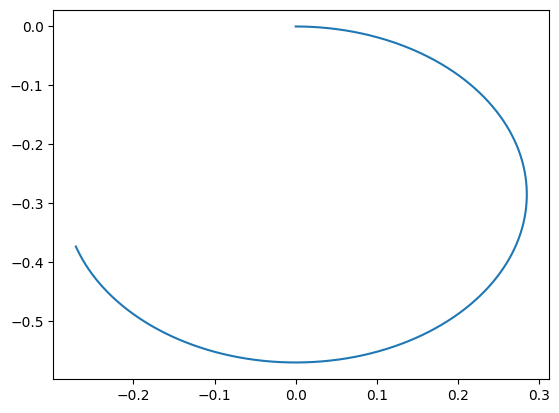

In [33]:
for i in range(1,n):

    path[i] = (theta_r[i-1] + theta_l[i-1]) * r / 2                             # path calculation for this cycle
    phi[i] = (theta_r[i-1] - theta_l[i-1]) * r / B                              # heading angle of the robot calculation
    x[i] = x[i-1] + (path[i]-path[i-1]) * m.cos(phi[i])                         # X coordinate calculation
    y[i] = y[i-1] + (path[i]-path[i-1]) * m.sin(phi[i])                         # Y coordinate calculation

    control_l [i] = 2                                                           # left motor control
    control_r [i] = 1                                                         # right motor control

    motor_l = odeint(motor, state_l,[t[i-1],t[i]],args=(control_l [i],))        # left motor simulation
    state_l = motor_l[1,:]                                                      # left motor state
    theta_l[i] = motor_l[1,1]                                                   # left motor angle
    motor_r = odeint(motor, state_r,[t[i-1],t[i]],args=(control_r [i],))        # right motor simulation
    state_r = motor_r[1,:]                                                      # right motor state
    theta_r[i] = motor_r[1,1]                                                   # right motor angle

plt.plot(x, y)
print(x)
print(y)                                                                 # visualization of the trajectory